In [1]:
%load_ext autoreload
%autoreload 2

from scipy.stats import *
import numpy as np
from matplotlib import cm, colors, pyplot as plt
# import ipywidgets
# import ipywidgets as widgets
from ipywidgets import interact

import os, sys
root_dir = os.path.dirname(os.path.abspath(''))
if not root_dir in sys.path: sys.path.append(root_dir)
from DM_theory.functions import get_alpha_0, get_dPsi, get_tau_I, get_nu_bar, get_q, border1, border2
# from general.helper import *
%matplotlib ipympl

interactive(children=(FloatSlider(value=25.0, description='nu_max', min=10.0), Output()), _dom_classes=('widge…

/tmp/ipykernel_517580/4225209220.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


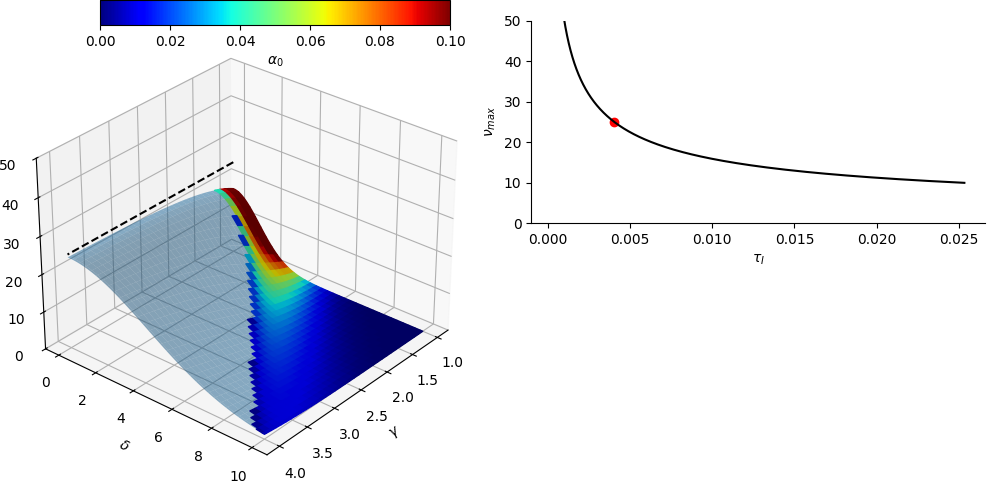

In [8]:
steps = 101
gamma_arr = np.linspace(1, 4, steps)
delta_arr = np.linspace(0, 10, steps)

gamma, delta = np.meshgrid(gamma_arr, delta_arr)

# print(gamma.shape,delta.shape)

plt.close("all")
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection="3d")


nu_max_default = 25.0
nu_max_arr = np.linspace(10, 100, 1001)
ax_tau = fig.add_subplot(222)
ax_tau.plot(get_tau_I(nu_max_arr), nu_max_arr, "k")
nu_marker = ax_tau.scatter(
    get_tau_I(nu_max_default), nu_max_default, marker="o", color="r"
)

plt.setp(ax_tau, xlabel="$\\tau_I$", ylabel="$\\nu_{max}$")
ax_tau.spines[["top", "right"]].set_visible(False)

norm = colors.Normalize(vmin=0, vmax=0.1)


@interact(nu_max=(10.0, 100.0))
def update_plot(nu_max=25.0):
    ax.clear()
    # print('he')

    # try:
    # print(gamma.shape,delta.shape)
    alpha_0 = get_alpha_0(gamma, delta, nu_max=nu_max, nP=1)[..., 0]

    # print(alpha_0,alpha_0.shape)
    nu_bar = get_nu_bar(gamma, delta, nu_max=nu_max)

    ax.plot_surface(gamma, delta, nu_bar, alpha=0.5)
    # return
    ax.plot_surface(gamma, delta, nu_bar, facecolors=cm.jet(norm(alpha_0)))
    ax.plot([gamma_arr.min(), gamma_arr.max()], [0, 0], [nu_max, nu_max], "k--")

    nu_marker.set_offsets([get_tau_I(nu_max), nu_max])

    nu_lim = max(50.0, nu_max * 1.1)

    plt.setp(
        ax,
        xlabel="$\\gamma$",
        ylabel="$\\delta$",
        zlabel="$\\bar{\\nu}$",
        zlim=[0, nu_lim],
    )
    plt.setp(ax_tau, ylim=[0, nu_lim])

    fig.canvas.draw_idle()
    # except:
    # 	pass


ax.view_init(30, 40, 0)

# cax = fig.add_subplot([0.6,0.1,0.35,0.1])
cax = fig.add_subplot([0.1, 0.95, 0.35, 0.05])
m = cm.ScalarMappable(cmap=cm.jet, norm=norm)
fig.colorbar(m, cax=cax, orientation="horizontal")
plt.setp(cax, xlabel="$\\alpha_0$")

plt.tight_layout()
plt.show()

/tmp/ipykernel_517580/3305804439.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax_alpha.legend()


interactive(children=(FloatSlider(value=1.2, description='gamma_1', max=4.0, min=1.0), FloatSlider(value=2.1, …

/tmp/ipykernel_517580/3305804439.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/tmp/ipykernel_517580/3305804439.py:108: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


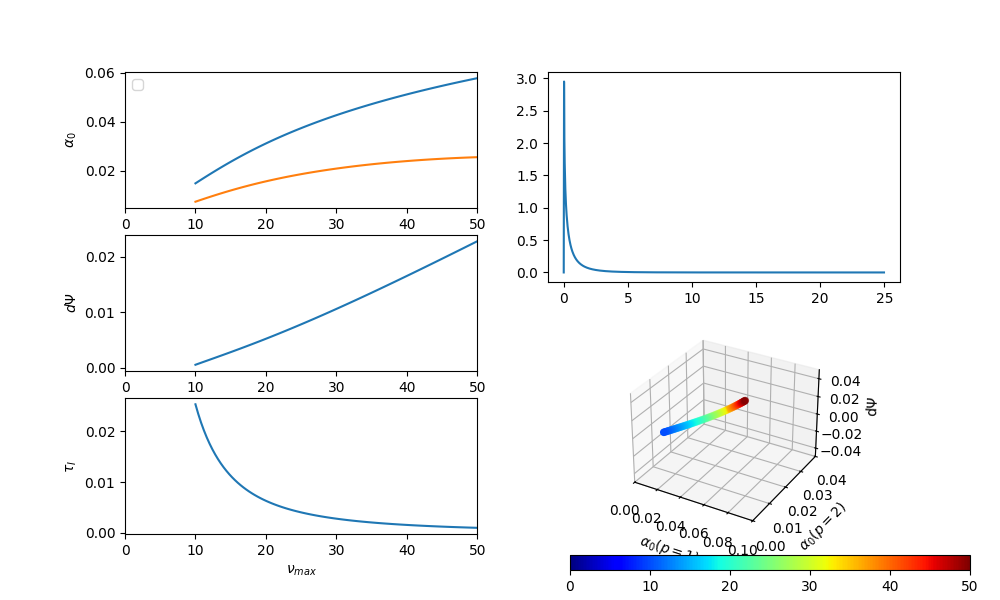

In [9]:
from inference.utils.utils import p_nu

gamma = [1.2, 3.1]
delta = [4.5, 7.0]
nu_max = np.linspace(10.0, 50.0, 101)
p = 0.35

tau_I = get_tau_I(nu_max)
alpha_0 = get_alpha_0(gamma, delta, nu_max, p=p, nP=2)
dPsi = get_dPsi(gamma, delta, nu_max, p=p, nP=2)

plt.close("all")

fig = plt.figure(figsize=(10, 6))
ax_3d_1 = fig.add_subplot(224, projection="3d")
# ax_3d_2 = fig.add_subplot(223,projection='3d')
cax = fig.add_subplot([0.57, 0.05, 0.4, 0.025])
# ax.plot(alpha_0[:,0],dPsi,tau_I)
# plt.setp(ax,xlabel='$\\alpha_0$',ylabel='$d\\Psi$',zlabel='$\\tau_I$')


# plt.colorbar(h_ax,cax=cax,orientation='horizontal')
plt.setp(cax, xlabel="$\\nu^{max}$")

ax_alpha = fig.add_subplot(321)
ax_psi = fig.add_subplot(323, sharex=ax_alpha)
ax_tau = fig.add_subplot(325, sharex=ax_alpha)

ax_distr = fig.add_subplot(222)

h_alpha = ax_alpha.plot(nu_max, alpha_0)
ax_alpha.legend()
(h_psi,) = ax_psi.plot(nu_max, dPsi)
(h_tau,) = ax_tau.plot(nu_max, tau_I)


plt.setp(ax_alpha, xlim=[0, nu_max[-1]], ylabel="$\\alpha_0$")
plt.setp(ax_tau, xlabel="$\\nu_{max}$", ylabel="$\\tau_I$")
plt.setp(ax_psi, xlabel="$\\nu_{max}$", ylabel="$d\\Psi$")


@interact(
    gamma_1=(1.0, 4.0),
    gamma_2=(1.0, 4.0),
    delta_1=(3.0, 10.0),
    delta_2=(3.0, 10.0),
    nu_max_ref=(10.0, 100.0),
)
def update_plot(gamma_1=1.2, gamma_2=2.1, delta_1=4.5, delta_2=6.0, nu_max_ref=25.0):

    gamma = [gamma_1, gamma_2]
    delta = [delta_1, delta_2]

    params = {
        "gamma_1": gamma_1,
        "delta_1": delta_1,
        "nu_max_1": nu_max_ref,
        "p": 0.35,
        "gamma_2": gamma_2,
        "delta_2": delta_2,
        "nu_max_2": nu_max_ref,
    }

    ax_3d_1.clear()
    # ax_3d_2.clear()

    tau_I = get_tau_I(nu_max)
    alpha_0 = get_alpha_0(gamma, delta, nu_max, p=p, nP=2)
    dPsi = get_dPsi(gamma, delta, nu_max, p=p, nP=2)

    norm = colors.Normalize(vmin=0, vmax=nu_max.max())

    h_ax = ax_3d_1.scatter(alpha_0[:, 0], alpha_0[:, 1], dPsi, c=cm.jet(norm(nu_max)))
    # ax_3d_2.scatter(alpha_0[:,0],alpha_0[:,1],dPsi,c=nu_max)
    # ax_3d_2.scatter(alpha_0[:,0],alpha_0[:,1],dPsi,c=cm.jet(norm(nu_max)))

    for axx in [ax_3d_1]:
        plt.setp(
            axx,
            xlabel="$\\alpha_0 (p=1)$",
            ylabel="$\\alpha_0 (p=2)$",
            zlabel="d$\\Psi$",
        )
        plt.setp(axx, xlim=[0, 0.1], ylim=[0, 0.04], zlim=[-0.05, 0.05])

    for h_a, a in zip(h_alpha, alpha_0.T):
        h_a.set_ydata(a)

    h_psi.set_ydata(dPsi)
    h_tau.set_ydata(tau_I)

    ax_distr.clear()

    nu_arr = np.linspace(0, nu_max_ref, 1001)
    (h_distr,) = ax_distr.plot(nu_arr, p_nu(nu_arr, params))

    for axx in [ax_alpha, ax_psi, ax_tau]:
        axx.relim()
        axx.autoscale_view()

    m = cm.ScalarMappable(cmap=cm.jet, norm=norm)
    fig.colorbar(m, cax=cax, orientation="horizontal")
    cax.set_xlabel("$\\nu_{max}$")

    fig.canvas.draw_idle()


plt.tight_layout()
plt.show()

In [10]:
plt.close("all")

interactive(children=(FloatSlider(value=1.2, description='gamma_1', max=4.0, min=1.0), FloatSlider(value=2.1, …

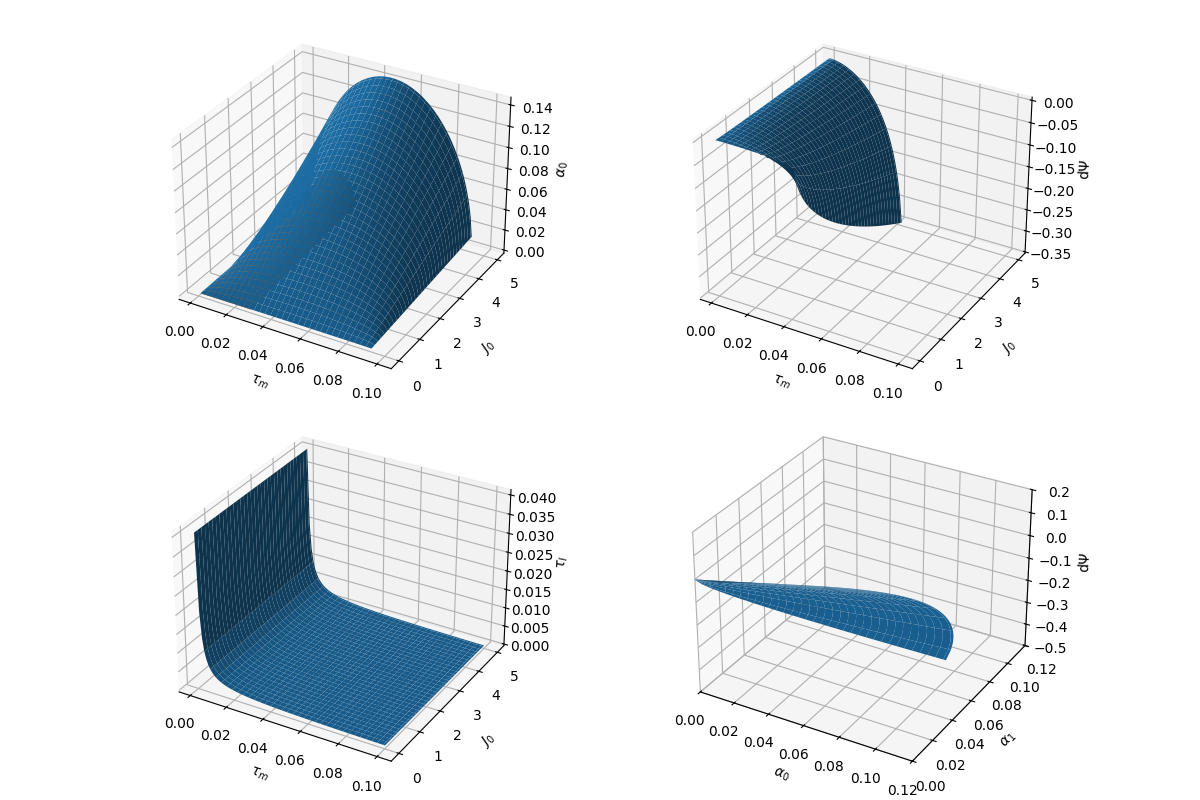

In [72]:
gamma = [1.2, 2.1]
delta = [4.5, 6.0]
nu_max = 25.0
p = 0.35

steps = 101
tau_m_arr = np.linspace(0.001, 0.1, steps)
J_0_arr = np.linspace(0.01, 5.0, steps)

tau_m, J_0 = np.meshgrid(tau_m_arr, J_0_arr)

fig = plt.figure(figsize=(12, 8))
ax_3d_alpha = fig.add_subplot(221, projection="3d")
ax_3d_Psi = fig.add_subplot(222, projection="3d")
ax_3d_tau = fig.add_subplot(223, projection="3d")
ax_3d_2 = fig.add_subplot(224, projection="3d")
# cax = fig.add_subplot([0.05,0.9,0.4,0.025])

# ax_3d_1.imshow(alpha_0[...,0],origin='lower',aspect='auto',extent=[tau_m_arr.min(),tau_m_arr.max(),J_0_arr.min(),J_0_arr.max()])


@interact(
    gamma_1=(1.0, 4.0),
    gamma_2=(1.0, 4.0),
    delta_1=(3.0, 10.0),
    delta_2=(3.0, 10.0),
    nu_max=(15.0, 100.0),
)
def update_plot(gamma_1=1.2, gamma_2=2.1, delta_1=4.5, delta_2=6.0, nu_max=25.0):

    gamma = [gamma_1, gamma_2]
    delta = [delta_1, delta_2]

    for axx in [ax_3d_alpha, ax_3d_Psi, ax_3d_tau, ax_3d_2]:
        axx.clear()

    tau_I = get_tau_I(nu_max, tau_m=tau_m)
    alpha_0 = get_alpha_0(gamma, delta, nu_max, p=p, tau_m=tau_m, J_0=J_0, nP=2)
    dPsi = get_dPsi(gamma, delta, nu_max, p=p, tau_m=tau_m, J_0=J_0, nP=2)

    ax_3d_Psi.plot_surface(tau_m, J_0, dPsi)
    plt.setp(ax_3d_Psi, xlabel="$\\tau_m$", ylabel="$J_0$", zlabel="d$\\Psi$")

    ax_3d_alpha.plot_surface(tau_m, J_0, alpha_0[..., 0])
    ax_3d_alpha.plot_surface(tau_m, J_0, alpha_0[..., 1])
    plt.setp(ax_3d_alpha, xlabel="$\\tau_m$", ylabel="$J_0$", zlabel="$\\alpha_0$")

    ax_3d_tau.plot_surface(tau_m, J_0, tau_I)
    plt.setp(ax_3d_tau, xlabel="$\\tau_m$", ylabel="$J_0$", zlabel="$\\tau_I$")

    ax_3d_2.plot_surface(alpha_0[..., 0], alpha_0[..., 1], dPsi)
    plt.setp(ax_3d_2, xlabel="$\\alpha_0$", ylabel="$\\alpha_1$", zlabel="d$\\Psi$")
    plt.setp(ax_3d_2, xlim=[0, 0.12], ylim=[0, 0.12], zlim=[-0.5, 0.2])

    fig.canvas.draw_idle()


plt.tight_layout()
plt.show()

In [2]:
# def get_sigma_V_sq(nu_bar, tau_A, tau_N, r, tau_M=0.01, J_0=-0.01):

#     sigma_V_A_sq = (
#         J_0**2
#         * nu_bar
#         / (tau_A + tau_M)
#         * ((1 - r) ** 2 / 2.0 + ((1 - r) * r * tau_A) / (tau_A + tau_N))
#     )

#     sigma_V_N_sq = (
#         J_0**2
#         * nu_bar
#         / (tau_N + tau_M)
#         * (r**2 / 2.0 + ((1 - r) * r * tau_N) / (tau_A + tau_N))
#     )

#     return sigma_V_A_sq + sigma_V_N_sq

In [3]:
tau_M = 0.01
J_0 = -1.0 * tau_M

gamma = 1.7
delta = 4.5
nu_max = 25.0

interactive(children=(FloatSlider(value=200.0, description='tau_N', max=500.0, min=1.0), Output()), _dom_class…

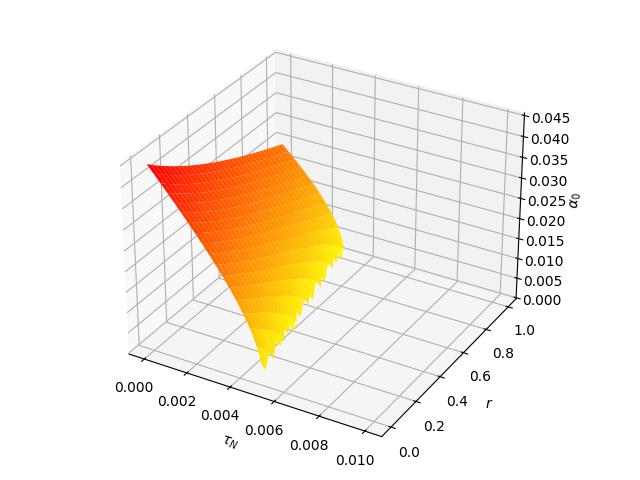

AttributeError: 'QuadMesh' object has no attribute 'do_3d_projection'

In [4]:
# import matplotlib as mpl

plt.close("all")
nu_bar = get_nu_bar(gamma, delta, nu_max)
q = get_q(gamma, delta, nu_max)

tau_A = np.linspace(0, 0.01, 101)[:, np.newaxis]
r = np.linspace(0, 1, 101)[np.newaxis, :]
X, Y = np.meshgrid(tau_A[:, 0], r[0, :])

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

cmap_name = "autumn_r"
cmap = plt.get_cmap(cmap_name)


@interact(
    tau_N=(1.0, 500.0),
)
def update_plot(tau_N=200.0):
    ax.clear()
    tau_N = tau_N / 1000.0

    sigma_V_sq = get_sigma_V_sq(
        get_nu_bar(gamma, delta, nu_max), tau_A, tau_N, r, tau_M=tau_M, J_0=J_0
    )
    alpha_0 = np.sqrt(sigma_V_sq / gamma**2 - J_0**2 * get_q(gamma, delta, nu_max))
    ax.plot_surface(X, Y, alpha_0, cmap=cmap)

    fig.canvas.draw_idle()


plt.setp(ax, xlabel="$\\tau_N$", ylabel="$r$", zlabel="$\\alpha_0$")
plt.tight_layout()
plt.show()

In [224]:
from scipy import optimize
from DM_theory.functions import (
    get_gamma,
    get_delta,
    get_nu_max,
    sigma_V,
    get_nu_bar,
    alpha,
    f_tau,
)
from DM_theory.network import network


def transform_guess(guess):
    return 1.0 / (1 + np.exp(-guess))


def residual(guess, gamma, delta, nu_max, alpha_0, tau_A, tau_N, tau_M=0.01, J_0=-1.0):

    J_0 = J_0 * tau_M

    r_N = transform_guess(guess)
    nu_bar = get_nu_bar(gamma, delta, nu_max)
    sigma_V_sq = sigma_V(nu_bar, tau_A, tau_N, r_N) ** 2
    alpha_sq = alpha(nu_bar, alpha_0, tau_A, tau_N, r_N) ** 2

    return gamma**2 - sigma_V_sq / alpha_sq


def obtain_solution(gamma, delta, nu_max, alpha_0, tau_A, tau_N, **kwargs):

    try:
        steps = len(tau_A)
    except:
        steps = len(tau_N)

    solution = np.zeros((steps, len(tau_N)), float)
    r_N_guess = np.zeros(steps, float)
    for idx in range(steps):
        solution[idx, :] = optimize.fsolve(
            residual, r_N_guess, args=(gamma, delta, nu_max, alpha_0, tau_A, tau_N[idx])
        )
    return transform_guess(solution)


def get_mixing(c, tau_A=0.005, tau_N=0.2, tau_M=0.01):
    ## ignoring 2nd solution (which appears to yield solutions with r > 1, only)
    pm_part = np.sqrt(
        c
        * (
            (
                tau_A**2 * tau_M
                + tau_A**2 * tau_N
                + tau_A * tau_M**2
                + tau_A * tau_N**2
                + tau_M**2 * tau_N
                + tau_M * tau_N**2
            )
            / 2.0
            + tau_A * tau_M * tau_N
        )
        - (tau_A * tau_M + tau_A * tau_N + tau_M * tau_N) / 4.0
    )

    positive_val = (-tau_N + 2.0 * pm_part) / (tau_A - tau_N)
    negative_val = (-tau_N - 2.0 * pm_part) / (tau_A - tau_N)

    return positive_val, negative_val


def get_constant(gamma, delta, nu_max, q_0):
    nu_bar = get_nu_bar(gamma, delta, nu_max)
    q = get_q(gamma, delta, nu_max)
    # print(f"{gamma=}, {nu_bar=}, {q=}, {q_0=}")

    return gamma**2 * (q + q_0) / nu_bar


def get_distribution_parameters(nu_bar, alpha_0, tau_A, tau_N, r_N):

    # print(f"{nu_bar=}, {alpha_0=}, {tau_A=}, {tau_N=}, {r_N=}")
    # gamma = get_gamma(nu_bar, alpha_0, tau_A, tau_N, r_N)
    # delta = get_delta(nu_bar, alpha_0, tau_A, tau_N, r_N)
    # nu_max = get_nu_max(nu_bar, tau_A, tau_N, r_N)
    # print(f"approx: {gamma=}, {delta=}, {nu_max=}")

    ### need to set up network without inhibitory neurons ( thus frate)
    net = network(tau_A=tau_A, tau_N=tau_N, r=r_N, alpha_0=alpha_0, eta=1.0, eps=1.0)
    selfcon = lambda q, nu: net.I_squared_nu(nu=nu, q=q, p=1) - net.I_squared_q(
        nu=nu, q=q, p=1
    )

    nu_bar_in = np.array([0.0, nu_bar])
    q_solved = optimize.fsolve(selfcon, nu_bar**2, args=(nu_bar_in))[0]
    # print(q_solved)

    # gamma = net.gamma(nu_bar_in, q_solved, p=0)
    # delta = net.delta(nu_bar_in, q_solved, p=0)
    # nu_max = net.rate_max(nu_bar_in, p=0)
    # print(f"exact (inhib): {gamma=}, {delta=}, {nu_max=}")
    gamma = net.gamma(nu_bar_in, q_solved, p=1)
    delta = net.delta(nu_bar_in, q_solved, p=1)
    nu_max = net.rate_max(nu_bar_in, p=1)
    print(f"exact (exc): {gamma=}, {delta=}, {nu_max=}")

    return gamma, delta, nu_max

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### define iterations
steps = 21
iter_keys = ["alpha_0", "tau_N"]
# iter_keys = ["tau_A", "tau_N"]
constant_key = "tau_A"
# constant_key = "alpha_0"
firing_rates = [0.1, 0.5, 2.0]


### define constants and arrays for the problem
arrays = {
    "tau_A": np.linspace(0.0001, 0.02, steps),
    "tau_N": np.linspace(0.05, 0.2, steps),
    "alpha_0": np.linspace(0, 0.05, steps),
}

grid = {}
grid[iter_keys[0]], grid[iter_keys[1]] = np.meshgrid(
    arrays[iter_keys[0]], arrays[iter_keys[1]]
)
grid["tau_A"], _ = np.meshgrid(arrays["tau_A"], arrays["tau_N"])

J_0 = -1.0
tau_M = 0.01
groundtruth = {
    "tau_A": 0.005,
    "tau_N": 0.1,
    "r_N": 0.4,
    "alpha_0": 0.02,
}

input_params = {key: groundtruth[key] for key in groundtruth.keys()}
input_params |= {key: grid[key] for key in iter_keys}


# ### calculate solutions
# r_N_solution = np.zeros((3, steps, steps), float)
# for i, firing_rate in enumerate(firing_rates):

#     r_N_solution[i, ...] = obtain_solution(
#         *get_distribution_parameters(firing_rate, **groundtruth),
#         **{key: arrays[key] for key in iter_keys},
#         **{constant_key: groundtruth[constant_key]},
#     )

### general plot setup
plt.close("all")
colors = ["reds", "blues", "greens"]
rows = 1
cols = 2

fig = make_subplots(
    rows=rows,
    cols=cols,
    specs=[[{"type": "scatter3d"} for _ in range(0, cols)] for _ in range(0, rows)],
)

gamma_conditions = np.zeros(3, float)
q_conditions = np.zeros(3, float)

### plot surfaces
for i, firing_rate in enumerate(firing_rates):
    fig.add_trace(
        go.Scatter3d(
            x=(np.NaN,),
            y=(np.NaN,),
            z=(np.NaN,),
            mode="markers",
            marker={"size": 10, "color": colors[i][:-1]},
            # line={"color": "black", "width": 5, 'dash':'dot'},
            name=f"firing rate = {firing_rate} Hz",
            # marker=markerstyle | {"colorscale": colors[i]},
        ),
        row=1,
        col=1,
    )

    # fig.add_trace(
    #     go.Surface(
    #         x=arrays[iter_keys[0]],
    #         y=arrays[iter_keys[1]],
    #         z=r_N_solution[i, ...],
    #         colorscale=colors[i],
    #         cmin=0.0,
    #         cmax=1.0,
    #         showscale=False,
    #     ),
    #     row=1,
    #     col=1,
    # )
    print("\n")
    print(f"{groundtruth=}")
    gamma, delta, nu_max = get_distribution_parameters(firing_rate, **groundtruth)
    q_0 = groundtruth["alpha_0"] ** 2 / (J_0 * tau_M) ** 2

    f_tau_from_const = get_constant(gamma, delta, nu_max, q_0)
    r_N_exact = get_mixing(
        f_tau_from_const,
        tau_A=grid["tau_A"],
        tau_N=grid["tau_N"],
        tau_M=tau_M,
    )
    print(r_N_exact[0])
    fig.add_trace(
        go.Surface(
            x=arrays["tau_A"],
            y=arrays["tau_N"],
            z=r_N_exact[0],
            colorscale=colors[i],
            cmin=0.0,
            cmax=1.0,
            showscale=False,
        ),
        row=1,
        col=2,
    )

    """
		should all manifolds collapse onto one? is it only different, because approximation of q gives slightly distinct solutions for different firing rates?
	"""

    # gamma, delta, nu_max = get_distribution_parameters(firing_rate, **groundtruth)
    q_0 = input_params["alpha_0"] ** 2 / (J_0 * tau_M) ** 2
    f_tau_from_const = get_constant(gamma, delta, nu_max, q_0)

    r_N_exact = get_mixing(
        f_tau_from_const,
        tau_A=input_params["tau_A"],
        tau_N=input_params["tau_N"],
        tau_M=tau_M,
    )

    fig.add_trace(
        go.Surface(
            name=f"firing rate = {firing_rate} Hz",
            x=arrays[iter_keys[0]],
            y=arrays[iter_keys[1]],
            z=r_N_exact[0],
            colorscale=colors[i],
            cmin=0.0,
            cmax=1.0,
            showscale=i == 0,
        ),
        row=1,
        col=1,
    )
    gamma_conditions[i] = gamma
    q_conditions[i] = get_q(gamma, delta, nu_max)

if "alpha_0" in iter_keys:
    # intersection
    q_0_intersection = (
        gamma_conditions[1] ** 2 * q_conditions[1] * firing_rates[0]
        - gamma_conditions[0] ** 2 * q_conditions[0] * firing_rates[1]
    ) / (
        gamma_conditions[0] ** 2 * firing_rates[1]
        - gamma_conditions[1] ** 2 * firing_rates[0]
    )
    alpha_0_intersection = np.sqrt(q_0_intersection * (J_0 * tau_M) ** 2)

    idx_intersection = np.where(
        np.isclose(arrays["alpha_0"], alpha_0_intersection, atol=1e-3)
    )[0][0]

    f_tau_intersection = (
        gamma_conditions[0] ** 2
        * gamma_conditions[1] ** 2
        * (q_conditions[1] - q_conditions[0])
        / (
            gamma_conditions[0] ** 2 * firing_rates[1]
            - gamma_conditions[1] ** 2 * firing_rates[0]
        )
    )

    r_N_intersection = get_mixing(
        f_tau_intersection,
        tau_A=input_params["tau_A"],
        tau_N=input_params["tau_N"][:, idx_intersection],
        tau_M=tau_M,
    )[0]
    print(f"intersection @ {f_tau_intersection=}, {r_N_intersection=}")

    fig.add_trace(
        go.Scatter3d(
            x=input_params["alpha_0"][:, idx_intersection],
            y=input_params["tau_N"][:, idx_intersection],
            z=r_N_intersection + 0.01,
            mode="lines",
            line={"color": "black", "width": 5, "dash": "dot"},
            name="intersection (theoretical)",
            # marker=markerstyle | {"colorscale": colors[i]},
        ),
        row=1,
        col=1,
    )

# ### plot intersections
# markerstyle = {"size": 2, "opacity": 0.6}
# for i in range(len(firing_rates) - 1):
#     d_r_N = r_N_solution[i, ...] - r_N_solution[i + 1, ...]
#     idxes = np.where(np.diff(d_r_N > 0, axis=1))

#     fig.add_trace(
#         go.Scatter3d(
#             x=arrays[iter_keys[0]][idxes[1]],
#             y=arrays[iter_keys[1]][idxes[0]],
#             z=r_N_solution[0, [idxes[0]], [idxes[1]]][0],
#             mode="markers",
#             marker=markerstyle | {"colorscale": colors[i]},
#         ),
#         row=1,
#         col=2,
#     )

### plot groundtruth
# for col in range(cols):
#     for row in range(rows):
# if row > 1 and col > 1:
#     continue
fig.add_trace(
    go.Scatter3d(
        x=[groundtruth["tau_A"]],
        y=[groundtruth["tau_N"]],
        z=[groundtruth["r_N"]],
        mode="markers",
        marker={"size": 10, "color": "black"},
        name="groundtruth",
    ),
    row=1,
    col=2,
)
fig.add_trace(
    go.Scatter3d(
        x=[groundtruth["alpha_0"]],
        y=[groundtruth["tau_N"]],
        z=[groundtruth["r_N"]],
        mode="markers",
        marker={"size": 10, "color": "black"},
        showlegend=False,
    ),
    row=1,
    col=1,
)

### adjust some layout
scene_dict = {
    # "xaxis": dict(range=[0.0, arrays[iter_keys[0]][-1]], title=iter_keys[0]),
    "yaxis": dict(range=[0.0, arrays[iter_keys[1]][-1]], title=iter_keys[1]),
    "zaxis": dict(range=[0.0, 1.0], title="r"),
}

camera = dict(
    up=dict(x=0, y=0, z=1), center=dict(x=0, y=-0.2, z=0), eye=dict(x=2.0, y=2.0, z=2.2)
)

fig.update_layout(scene1_camera=camera)

fig.update_layout(
    scene1=scene_dict
    | {"xaxis": dict(range=[0.0, arrays["alpha_0"][-1]], title="alpha_0")},
    scene2=scene_dict
    | {"xaxis": dict(range=[0.0, arrays["tau_A"][-1]], title="tau_A")},
    scene1_camera=camera,
    scene2_camera=camera,
    # scene3=scene_dict,
    showlegend=True,
    width=600,
    height=400,
    legend=dict(orientation="h"),
    # margin=dict(r=20, l=10, b=10, t=10),
)

fig.show()



groundtruth={'tau_A': 0.005, 'tau_N': 0.1, 'r_N': 0.4, 'alpha_0': 0.02}
exact (exc): gamma=array([0.5687088]), delta=array([3.49619514]), nu_max=20.49097225618945
[[0.58199674 0.5682387  0.55365829 0.53824247 0.52196945 0.50480953
  0.4867254  0.46767236 0.44759818 0.42644287 0.40413823 0.38060716
  0.35576292 0.32950803 0.30173306 0.27231511 0.24111599 0.20798009
  0.17273173 0.13517209 0.09507544]
 [0.56071311 0.54457747 0.52790996 0.51067422 0.49283258 0.47434558
  0.45517161 0.43526643 0.41458285 0.39307027 0.37067423 0.34733594
  0.32299175 0.29757256 0.27100313 0.24320135 0.21407741 0.18353278
  0.15145913 0.11773705 0.08223453]
 [0.54502047 0.52720926 0.50908158 0.49058598 0.47167461 0.45230189
  0.43242348 0.41199546 0.39097366 0.36931311 0.34696751 0.32388875
  0.30002652 0.27532779 0.24973643 0.22319268 0.19563271 0.16698805
  0.137185   0.10614403 0.07377901]
 [0.53295147 0.5139002  0.4946993  0.47528652 0.45560674 0.43560993
  0.41524961 0.39448176 0.37326392 0.35155447 0

/tmp/ipykernel_366627/735913699.py:48: RuntimeWarning:

invalid value encountered in sqrt

/tmp/ipykernel_366627/184904212.py:153: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

/tmp/ipykernel_366627/184904212.py:154: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [ ]:
idxes = np.argmin(np.abs(r_N_solution - r_N_solution_2), axis=1)

print(r_N_solution[range(len(idxes)), idxes])
print(r_N_solution_2[range(len(idxes)), idxes])

[1.         0.99947338 0.98830235 0.99033281 0.98163722 0.97505783
 0.77732037 0.8521272  0.81948835 0.79555678 0.81277662 0.82806664
 0.81979832 0.83212498 0.69192875 0.67428679 0.66058851 0.64866074
 0.84102437 0.62335179 0.61581219 0.60438212 0.59850745 0.58935343
 0.58455882 0.57700074 0.57018343 0.56656906 0.56075292 0.55542646
 0.55253415 0.54788629 0.54358302 0.53958621 0.53734109 0.53377633
 0.53044006 0.52731051 0.52436863 0.52159772 0.51994292 0.51741474
 0.51502157 0.51275273 0.51059863 0.50855068 0.50660111 0.50474291
 0.50349118 0.5017618  0.50010819]
[1.         0.99994044 0.98836667 0.99818518 0.98069132 0.98493965
 0.77824342 0.86192668 0.82994698 0.81149628 0.8101116  0.83449022
 0.82113125 0.83322638 0.69231512 0.67477487 0.66042979 0.64815687
 0.84133058 0.62356631 0.61543489 0.6047396  0.59822756 0.58960561
 0.58417242 0.57702479 0.57055533 0.56630023 0.56077056 0.55569461
 0.55217994 0.54774709 0.5436359  0.53981167 0.53696538 0.53355449
 0.53035845 0.52735719 0.52

In [96]:
tau_M = 0.01
J_0 = -1.0 * tau_M

tau_A = 0.005
tau_N = 0.1
r_N = 0.4

nu_bar = 0.1
alpha_0 = 0.004

q_0 = alpha_0**2 / J_0**2
print(f"{q_0=}")

gamma, delta, nu_max = get_distribution_parameters(nu_bar, alpha_0, tau_A, tau_N, r_N)


c = get_constant(gamma, delta, nu_max, q_0)
r = get_mixing(c, tau_A=tau_A, tau_N=tau_N, tau_M=tau_M)
print(f"{c=}")
print(f"{r=}")

q_0=0.15999999999999998
gamma=1.0108433065997873, delta=4.488058181137901, nu_max=20.49097225618945
nu_bar=0.10000000000000009, q=0.3110044445411937
c=4.8127431517518175
pm_part=0.005422534049731847
r=(0.9384729673740664, 1.1667901905206706)


In [ ]:
tau_A_grid, tau_N_grid = np.meshgrid(arrays["tau_A"], arrays["tau_N"])
r = get_mixing(c, tau_A=tau_A_grid, tau_N=tau_N_grid, tau_M=tau_M)
# tau_A_grid

fig = make_subplots(
    rows=1,
    cols=2,
    specs=[[{"type": "scatter3d"} for _ in range(0, cols)] for _ in range(0, rows)],
)
fig.add_trace(
    go.Surface(
        x=arrays[iter_keys[0]],
        y=arrays[iter_keys[1]],
        z=r[0],
        colorscale=colors[i],
        cmin=0.0,
        cmax=1.0,
        showscale=False,
    ),
    row=1,
    col=1,
)
fig.show()

pm_part=array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.02247075, 0.02252862, 0.0225864 , ..., 0.03268827, 0.03273552,
        0.03278274],
       [0.0225937 , 0.02265188, 0.02270996, ..., 0.0328602 , 0.03290765,
        0.03295507],
       [0.02271658, 0.02277507, 0.02283345, ..., 0.03303204, 0.0330797 ,
        0.03312733]])


/tmp/ipykernel_366627/329874681.py:3: RuntimeWarning:

invalid value encountered in sqrt



In [17]:
from scipy import optimize

# parameters
nx, ny = 75, 75
hx, hy = 1.0 / (nx - 1), 1.0 / (ny - 1)

In [18]:
P_left, P_right = 0, 0
P_top, P_bottom = 1, 0

In [19]:
def residual(P):
    d2x = np.zeros_like(P)
    d2y = np.zeros_like(P)
    d2x[1:-1] = (P[2:] - 2 * P[1:-1] + P[:-2]) / hx / hx
    d2x[0] = (P[1] - 2 * P[0] + P_left) / hx / hx
    d2x[-1] = (P_right - 2 * P[-1] + P[-2]) / hx / hx
    d2y[:, 1:-1] = (P[:, 2:] - 2 * P[:, 1:-1] + P[:, :-2]) / hy / hy
    d2y[:, 0] = (P[:, 1] - 2 * P[:, 0] + P_bottom) / hy / hy
    d2y[:, -1] = (P_top - 2 * P[:, -1] + P[:, -2]) / hy / hy
    return d2x + d2y - 10 * np.cosh(P).mean() ** 2

In [ ]:
guess = np.zeros((nx, ny), float)
sol = optimize.root(residual, guess, method="krylov")
print("Residual: %g" % abs(residual(sol.x)).max())

Residual: 5.78778e-06


In [ ]:
import matplotlib.pyplot as plt

x, y = np.mgrid[0 : 1 : (nx * 1j), 0 : 1 : (ny * 1j)]
plt.pcolormesh(x, y, sol.x, shading="gouraud")
plt.colorbar()
plt.show()

AttributeError: 'QuadMesh' object has no attribute 'do_3d_projection'

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous view', 'arrow-left', 'back'), ('Forward', 'Forward to next view', 'arrow-right', 'forward'), ('Pan', 'Left button pans, Right button zooms\nx/y fixes axis, CTRL fixes aspect', 'arrows', 'pan'), ('Zoom', 'Zoom to rectangle\nx/y fixes axis', 'square-o', 'zoom'), ('Download', 'Download plot', 'floppy-o', 'save_figure')]))